# Import Modules

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import missingno as msno
import warnings
import pickle

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from lightgbm import LGBMClassifier
from scipy.stats import yeojohnson, boxcox
from tensorflow.keras.layers import Dense, Activation, Dropout
from sklearn.metrics import accuracy_score, f1_score, make_scorer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.optimizers import Adam
from sklearn.pipeline import Pipeline

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
SEED = 42

# Load Dataset

In [3]:
df = pd.read_csv('Data/fraud_oracle/fraud_oracle.csv')

In [4]:
df

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994.0,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994.0,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994.0,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994.0,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994.0,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8948,Feb,4,Saturday,Mazda,Rural,Tuesday,Mar,2,Male,Married,...,more than 7,36 to 40,No,No,Internal,3 to 5,no change,1 vehicle,1995.0,Liability
8949,Feb,4,Saturday,Honda,Urban,Wednesday,Mar,1,Male,Married,...,7 years,36 to 40,No,No,External,3 to 5,no change,1 vehicle,1995.0,Collision
8950,Jul,1,Monday,Toyota,Urban,Thursday,Jun,5,Male,Married,...,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1995.0,Collision
8951,Oct,4,Friday,Pontiac,Urban,Thursday,Nov,4,Female,Married,...,7 years,31 to 35,No,No,External,none,no change,1 vehicle,1995.0,Liability


In [5]:
df.head(10)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994.0,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994.0,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994.0,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994.0,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994.0,Collision
5,Oct,4,Friday,Honda,Urban,Wednesday,Nov,1,Male,Single,...,5 years,21 to 25,No,No,External,3 to 5,no change,1 vehicle,1994.0,Collision
6,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,...,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994.0,Collision
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994.0,Collision
8,Dec,4,Saturday,Honda,Urban,Wednesday,Dec,5,Male,Single,...,6 years,31 to 35,No,Yes,External,3 to 5,no change,1 vehicle,1994.0,Collision
9,Apr,3,Tuesday,Ford,Urban,Wednesday,Apr,3,Male,Married,...,more than 7,36 to 40,No,No,External,3 to 5,no change,1 vehicle,1994.0,All Perils


# **A. Statistik Deskriptif**


  Statistik deskriptif, seperti yang diberikan oleh fungsi `df.describe()` dan `df.info()` dalam `pandas`, memainkan peran penting dalam memahami karakteristik dasar dari data secara cepat dan efisien. Dengan menyediakan informasi kunci seperti rata-rata, standar deviasi, nilai minimum dan maksimum, jumlah nilai kosong, serta tipe data, statistik ini membantu mengidentifikasi pola, tren, dan anomali dalam dataset. Ini memungkinkan deteksi outlier dan pengecekan kualitas data, seperti konsistensi tipe data dan keberadaan nilai yang hilang. Manfaat ini sangat penting untuk merencanakan langkah-langkah analisis atau tindakan preprocessing selanjutnya, seperti pengisian data yang hilang atau normalisasi data, sehingga mendukung pengambilan keputusan yang lebih baik dan meningkatkan kualitas analisis data secara keseluruhan.

In [6]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,8953.000000,8953.000000,8953.000000,8952.000000,8952.000000,8952.000000,8952.000000,8952.000000,8952.000000
mean,2.795599,2.689378,39.688373,0.063226,4476.500000,8.456769,407.730116,2.494750,1994.313896
std,1.286745,1.254445,13.530906,0.243383,2584.364138,4.606554,43.994845,1.119482,0.464101
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,30.000000,0.000000,2238.750000,4.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,4476.500000,8.000000,400.000000,3.000000,1994.000000
75%,4.000000,4.000000,48.000000,0.000000,6714.250000,12.000000,400.000000,3.000000,1995.000000
max,5.000000,5.000000,80.000000,1.000000,8952.000000,16.000000,700.000000,4.000000,1995.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8953 entries, 0 to 8952
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 8953 non-null   object 
 1   WeekOfMonth           8953 non-null   int64  
 2   DayOfWeek             8953 non-null   object 
 3   Make                  8953 non-null   object 
 4   AccidentArea          8953 non-null   object 
 5   DayOfWeekClaimed      8953 non-null   object 
 6   MonthClaimed          8953 non-null   object 
 7   WeekOfMonthClaimed    8953 non-null   int64  
 8   Sex                   8953 non-null   object 
 9   MaritalStatus         8953 non-null   object 
 10  Age                   8953 non-null   int64  
 11  Fault                 8953 non-null   object 
 12  PolicyType            8952 non-null   object 
 13  VehicleCategory       8952 non-null   object 
 14  VehiclePrice          8952 non-null   object 
 15  FraudFound_P         

# **B. Exploratory Data Analysis**


## 1. Distribusi Data

Kode ini membuat histogram untuk semua kolom numerik dalam DataFrame `df`, menggunakan fungsi `hist` dari Pandas. Histogram membantu kita memahami distribusi data, mengidentifikasi pola, outlier, dan distribusi frekuensi dalam berbagai interval. Parameter `figsize=(20, 30)` menentukan ukuran gambar agar histogram tampil jelas. Fungsi `plt.show()` menampilkan semua histogram dalam satu gambar, memberikan gambaran awal tentang karakteristik dasar setiap variabel numerik.

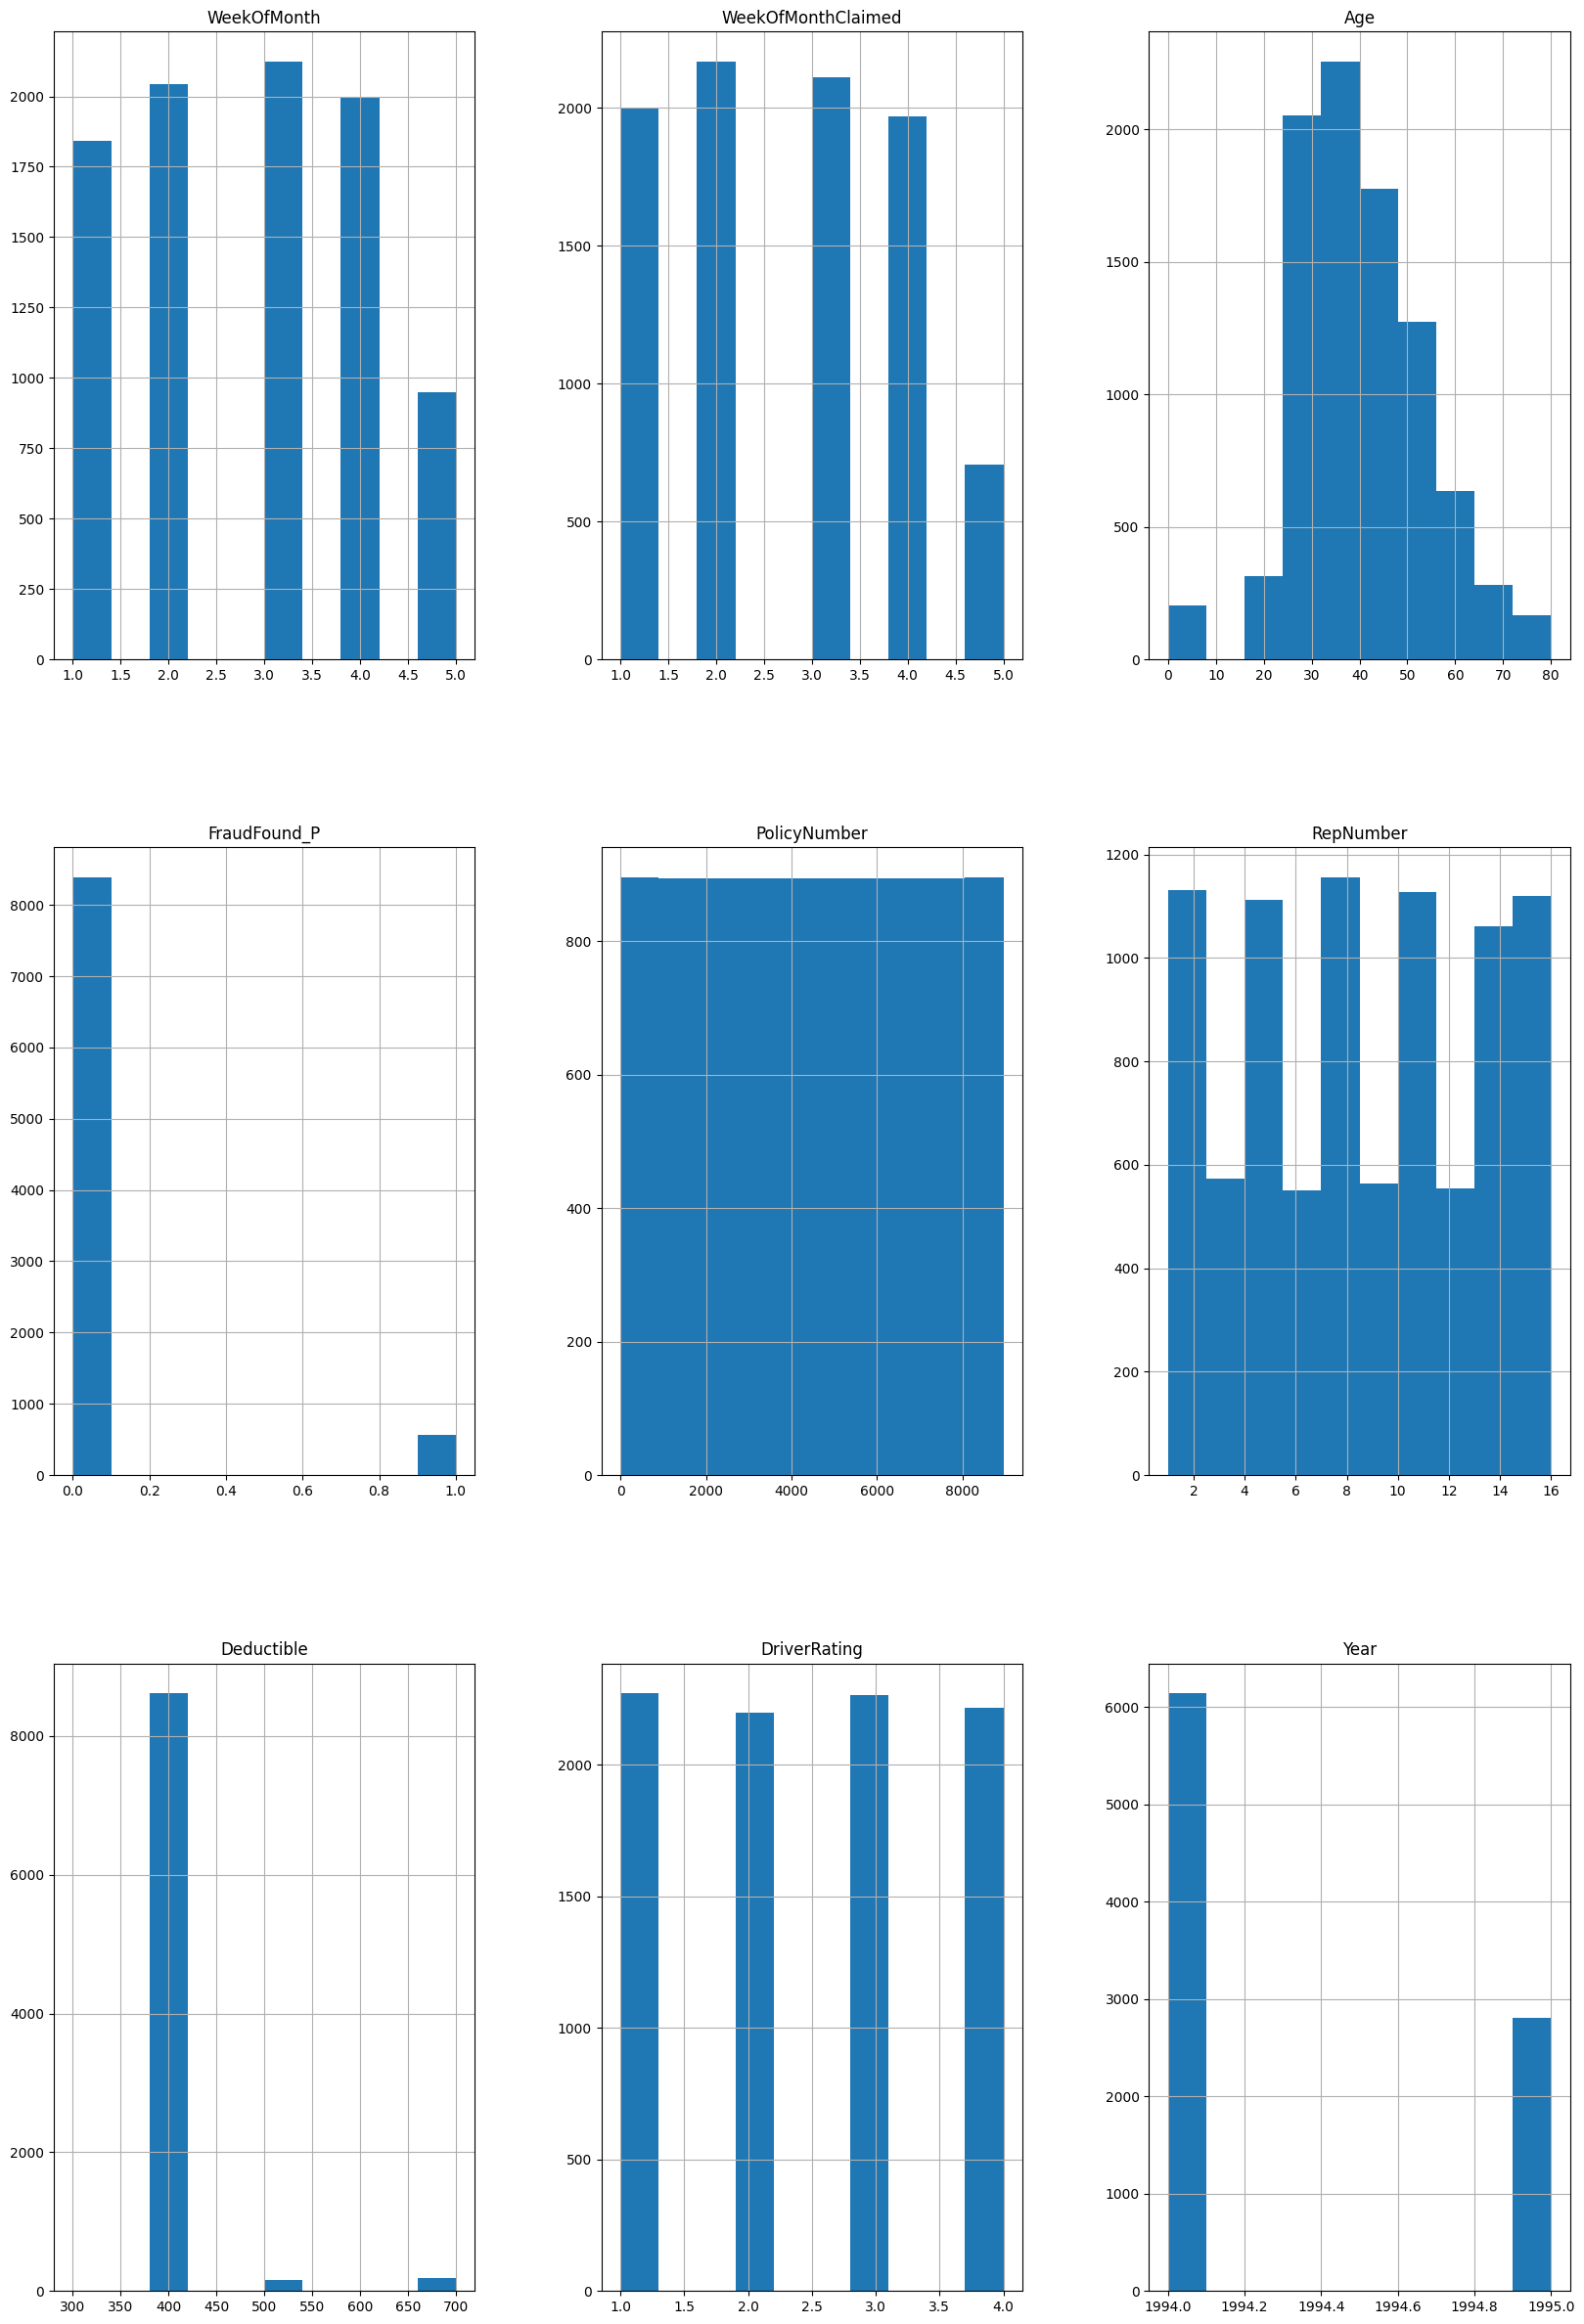

In [8]:
df.hist(figsize=(20, 30))
plt.show()

## 2. Distribusi Usia

Dalam kode ini, histogram dibuat dari kolom Age dengan membagi data ke dalam 30 bagian dengan menggunakan `bins=30`. Selain itu, kita menambahkan kurva kepadatan kernel menggunakan `kde=True` untuk memvisualisasikan distribusi yang lebih halus. Histogram ini membantu kita untuk melihat apakah ada pola tertentu dalam distribusi usia, seperti apakah ada kelompok usia tertentu yang mendominasi dataset.


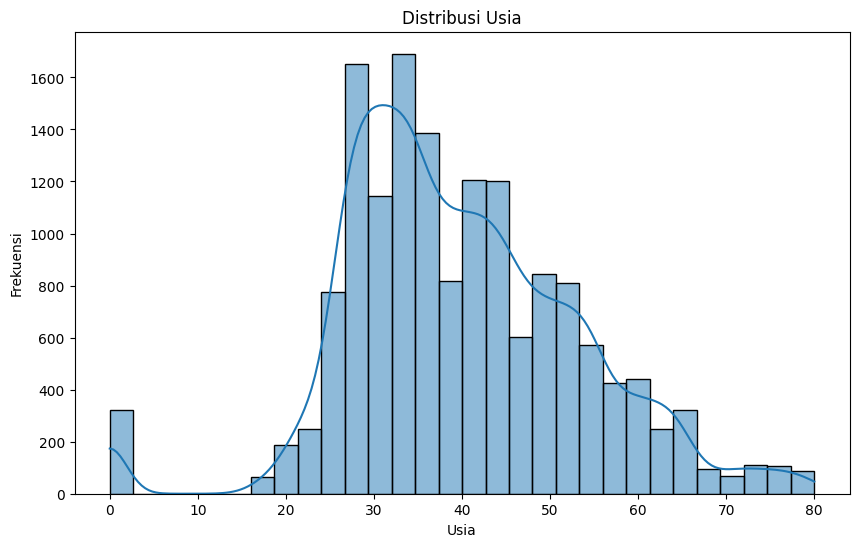

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

## 3. Distribusi Klaim Penipuan

Distribusi klaim penipuan `FraudFound_P` dianalisis menggunakan count plot. Count plot ini menghitung dan menampilkan jumlah klaim penipuan yang ditemukan dalam dataset. `FraudFound_P` memiliki dua nilai: 0 (tidak ditemukan penipuan) dan 1 (ditemukan penipuan). Plot ini membantu kita untuk melihat proporsi klaim yang ditemukan sebagai penipuan dibandingkan dengan yang tidak. Dari plot ini, kita dapat mengidentifikasi apakah klaim penipuan merupakan kejadian yang jarang atau sering dalam dataset.

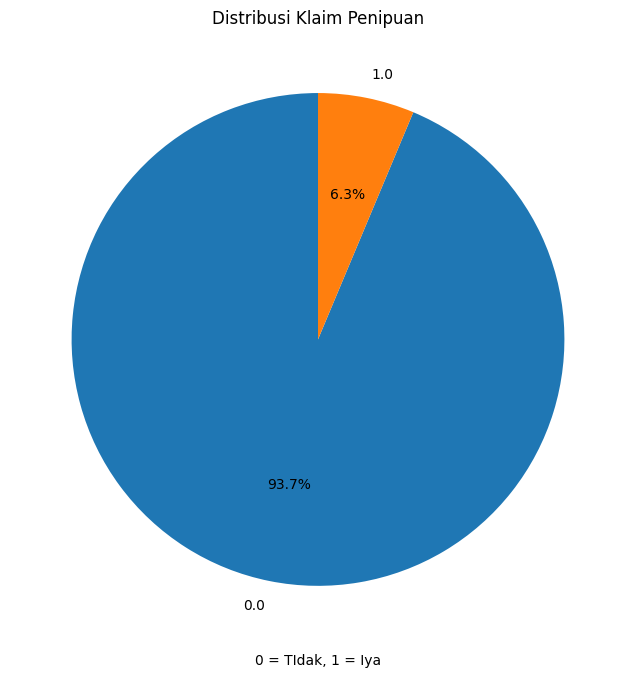

In [15]:
plt.figure(figsize=(8, 8))
df['FraudFound_P'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Klaim Penipuan')
plt.xlabel('0 = TIdak, 1 = Iya')
plt.ylabel('')
plt.show()

## 4. Hubungan Antara Usia dan Jumlah Klaim yang Dilaporkan

Untuk menganalisis apakah ada hubungan antara usia dan jumlah klaim yang dilaporkan `RepNumber`, kita menggunakan scatter plot. Dengan menggunakan scatter plot, kita dapat melihat apakah ada pola atau tren tertentu yang menunjukkan hubungan antara dua variabel ini. Dari scatter plot yang ditampilkan, terlihat bahwa klaim yang dilaporkan tersebar merata di berbagai rentang usia tanpa pola yang jelas, menunjukkan bahwa jumlah klaim yang dilaporkan mungkin tidak terlalu dipengaruhi oleh usia.

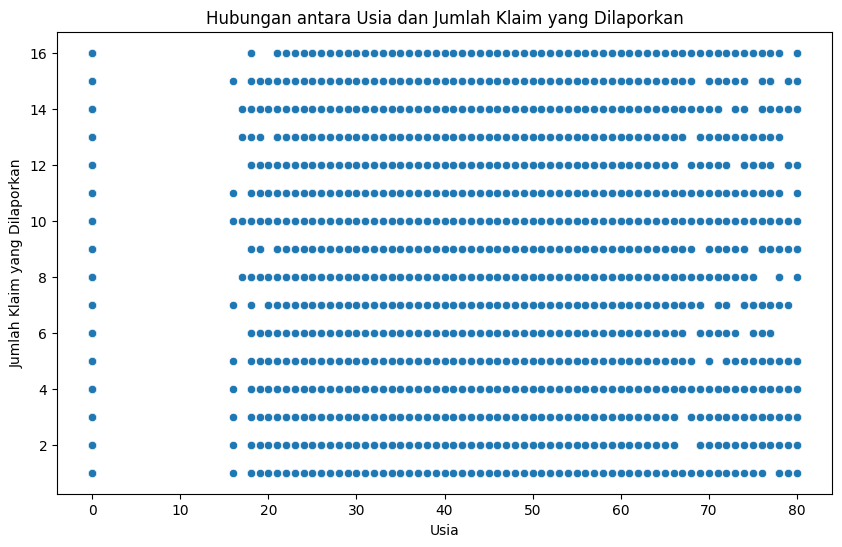

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='RepNumber', data=df)
plt.title('Hubungan antara Usia dan Jumlah Klaim yang Dilaporkan')
plt.xlabel('Usia')
plt.ylabel('Jumlah Klaim yang Dilaporkan')
plt.show()

## 5. Perbandingan Rata-Rata Nilai Klaim yang Ditemukan Penipuan dan Tidak

Untuk membandingkan rata-rata jumlah klaim yang ditemukan penipuan dan tidak, kita menggunakan box plot. Box plot ini menampilkan distribusi jumlah klaim yang dilaporkan `RepNumber` berdasarkan apakah ditemukan penipuan `FraudFound_P`. Box plot menunjukkan median, kuartil, dan outlier dalam data, yang memberikan gambaran lengkap tentang distribusi dan variabilitas data. Dari box plot ini, disini dapat dilihat klaim yang ditemukan penipuan cenderung memiliki jumlah klaim yang lebih tinggi atau lebih rendah dibandingkan dengan klaim yang tidak ditemukan penipuan.

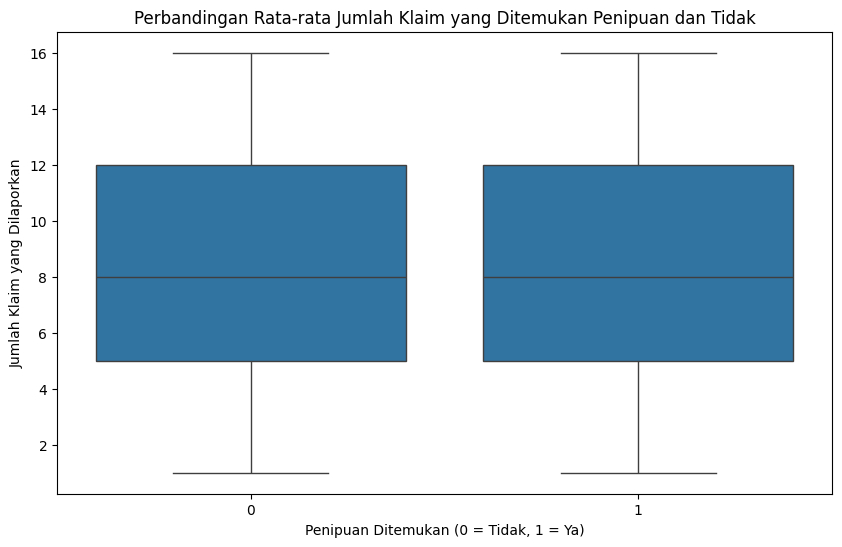

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='FraudFound_P', y='RepNumber', data=df)
plt.title('Perbandingan Rata-rata Jumlah Klaim yang Ditemukan Penipuan dan Tidak')
plt.xlabel('Penipuan Ditemukan (0 = Tidak, 1 = Ya)')
plt.ylabel('Jumlah Klaim yang Dilaporkan')
plt.show()

## 6. Tren Tahunan

Untuk menganalisis apakah ada tren tahunan dalam data, kita menggunakan count plot. Count plot ini menghitung dan menampilkan jumlah klaim per tahun `Year`. Dengan plot ini, kita dapat melihat bagaimana jumlah klaim berubah dari tahun ke tahun. Ini membantu kita untuk mengidentifikasi apakah ada peningkatan atau penurunan jumlah klaim dalam periode waktu tertentu, yang dapat memberikan wawasan tentang tren historis dalam data klaim.

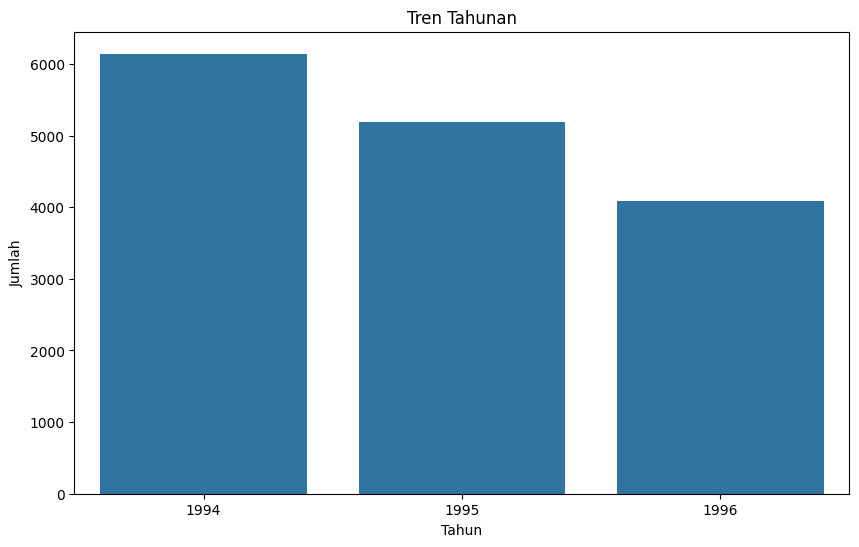

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=df)
plt.title('Tren Tahunan')
plt.xlabel('Tahun')
plt.ylabel('Jumlah')
plt.show()

## 7. Frekuensi Kelas

Kode ini membuat pie chart untuk menunjukkan distribusi klaim penipuan `FraudFound_P` dalam dataset. Pie chart membantu memvisualisasikan proporsi klaim penipuan yang ditemukan (1) dan yang tidak ditemukan (0) dengan jelas.


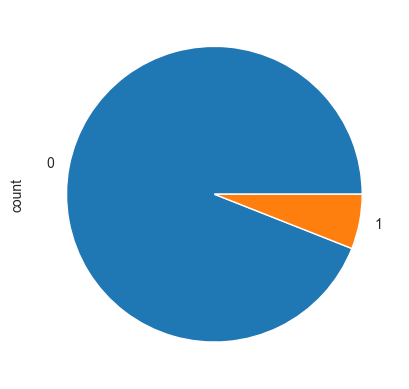

In [ ]:
df['FraudFound_P'].value_counts().plot(kind='pie')
plt.show()

# **C. Missing Value**

Kode ini membuat bar chart untuk menampilkan jumlah nilai kosong (missing values) di setiap kolom dalam dataset. Bar chart ini membantu mengidentifikasi kolom mana yang memiliki data hilang dan seberapa banyak, sehingga bisa dipertimbangkan untuk penanganan lebih lanjut.

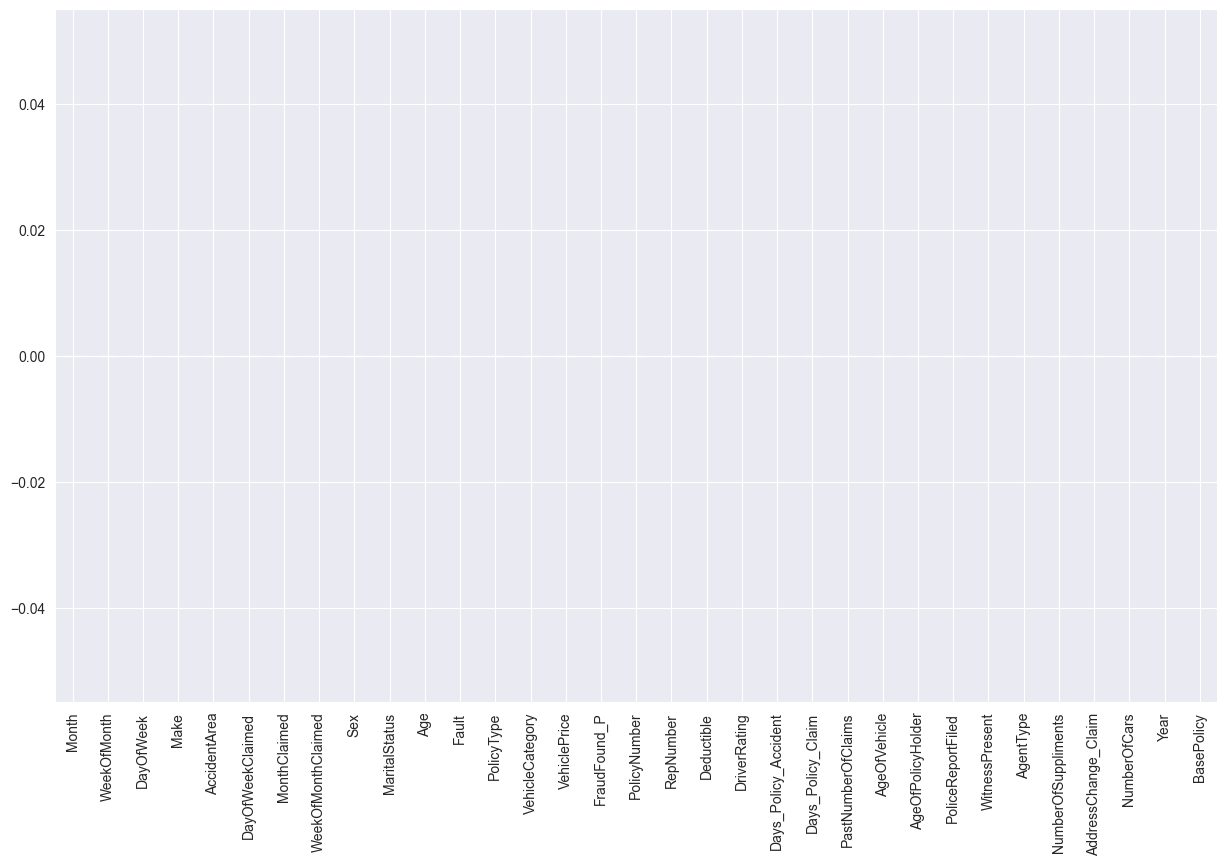

In [ ]:
plt.figure(figsize=(15,9))
df.isnull().sum().plot(kind='bar')
plt.show()

# D. Heatmap Correlation

Kode ini membuat heatmap untuk menampilkan matriks korelasi antara kolom numerik dalam dataset. Heatmap ini membantu memahami hubungan linear antar variabel, menunjukkan seberapa kuat dan arah korelasi (positif atau negatif) antar variabel.

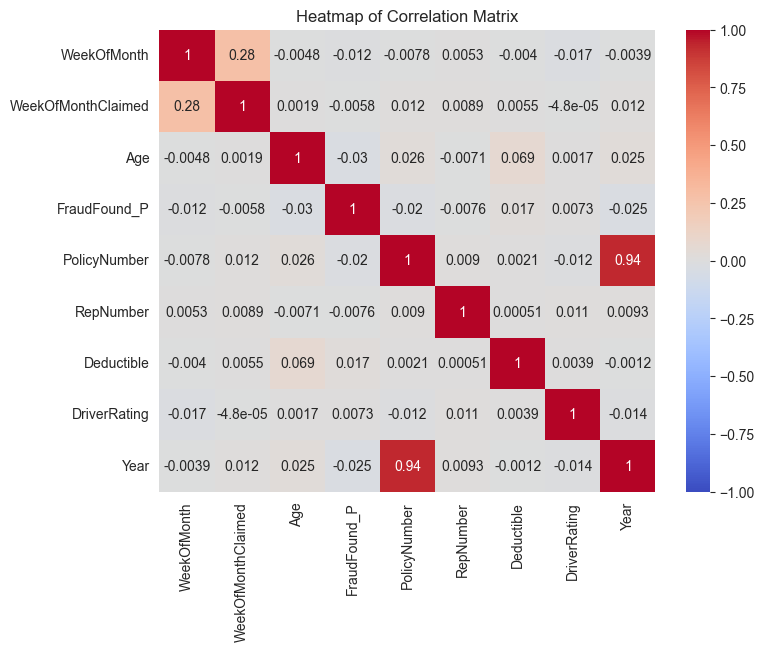

In [ ]:
df_num = df.select_dtypes(include=['float64', 'int64'])
corr = df_num.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Matrix')
plt.show()